<center><h1 style="color:#173F8A;"> Cálculo Científico I, MAT2605, 2025-2 </h1></center>
<h3 style="color:#173F8A;text-align:left;"> Facultad de Matemáticas<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:left;"> Profesor: Manuel A. Sanchez<br> </h3>
<h4 style="color:#0176DE;text-align:left;"> Ayudantes: Tomás Malfetano (tomas.malfetano@uc.cl), Diego Vera (dva@uc.cl)<br> </h4>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="200" height="400"><br><br><br><br><br>
</figure>
 -->
<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

# Ayudantía 13

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problema 1

Ajuste una recta y una función cuadrática por mínimos cuadrados a los datos:

$$
\{
(-1, 0.3), (0, -0.2), (2, 7.3), (3, 23.3)    
\}
$$
Escriba el sistema a resolver en cada caso y calcule el resultado computacionalmente y grafique.

In [3]:
A1 = np.array([[1, -1],
               [1, 0],
               [1, 2],
               [1, 3]])

b = np.array([0.3, -0.2, 7.3, 23.3])

c1 = np.linalg.solve(A1.T@A1, A1.T@b)

print(c1)

[2.325 5.35 ]


In [4]:
A2 = np.array([[1, -1, 1],
               [1, 0, 0],
               [1, 2, 4],
               [1, 3, 9]])

b = np.array([0.3, -0.2, 7.3, 23.3])

c2 = np.linalg.solve(A2.T@A2, A2.T@b)

print(c2)

[-1.8  -0.15  2.75]


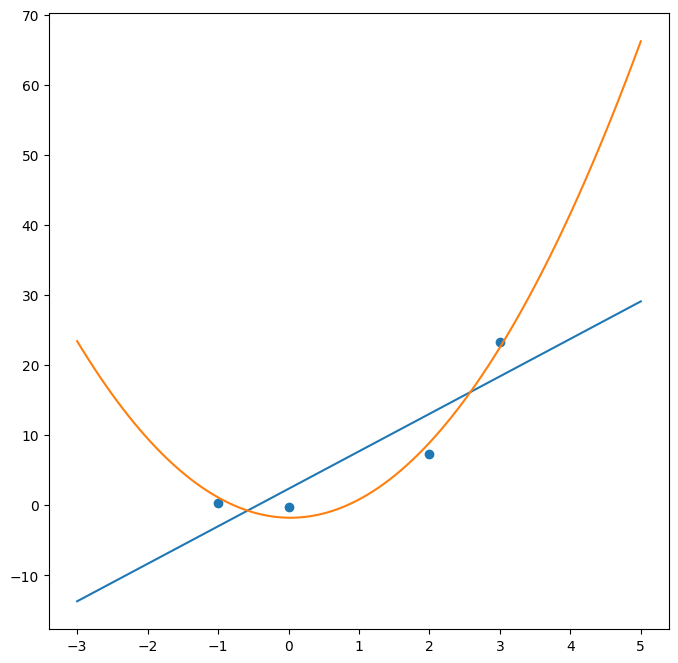

In [5]:
line = lambda x: c1[1]*x + c1[0]
quadratic = lambda x: c2[2]*x**2 + c2[1]*x + c2[0]

x_mesh = np.linspace(-3, 5, 100)


plt.figure(figsize=(8,8))
plt.scatter([-1, 0, 2, 3], [0.3, -0.2, 7.3, 23.3])
plt.plot(x_mesh, line(x_mesh))
plt.plot(x_mesh, quadratic(x_mesh))
plt.show()

# Problema 2

Considere la forma bilineal
$$
\langle f, g \rangle := \int_{-1}^1 f'(x)g'(x) dx
$$

1. Probar que $\langle \cdot, \cdot \rangle$ es un producto interior en $S_m$, el espacio generado por $\{x, x^2, x^3, \dots, x^m\}$.
2. Hallar una base ortonormal para $S_3$.
3. Hallar la mejor aproximación en el sentido de mínimos cuadrados sobre $S_3$ de $f(x) = x^4$ y $f(x) = 1$.

# Problema 3

Para este problema, intentaremos predecir la posición de un objeto celeste utilizando mínimos cuadrados. Particularmente, intentaremos predecir la posición del planeta enano Ceres, a las 17:00 horas del 13 de noviembre del 2025. Para esto, se han registrado las coordenadas celestiales del planeta enano durante las últimas cinco ayudantías, a la misma hora (datos espaciados por una semana) 
$$
\begin{array}{c|ccccc}
\text{Semana } t & 0 & 1 & 2 & 3 & 4 \\
\hline
\text{RA (°)}  & 11.579 & 17.875 & 20.670 & 18.3458 & 12.400 \\
\text{DEC (°)} & -6.1716 & -5.1625 & -6.0010 & -8.5090 & -10.740
\end{array}
$$

queremos entonces obtener las coordenadas de la sexta semana ($t=5$).

1. Considerando el problema de minimización $\min_{x\in \mathbb{R}^n} \|Ax - b\|_2$ programe una función que reciba la matriz $A$ y el vector $b$ y resuelva el sistema normal asociado.

2. Queremos ajustar los siguientes modelos trigonométricos para las coordenadas.

$$
RA(t) = a_0 + a_1 \cos(\omega t) + a_2 \sin(\omega t),
\qquad\text{con } \omega = \frac{2\pi}{T}.
$$

$$
Dec(t) = b_0 + b_1 \cos(\omega t) + b_2 \sin(\omega t),
\qquad\text{con } \omega = \frac{2\pi}{T}.
$$

Construya las matrices correspondientes para este problema. Utilice \(T = 15\) días.

In [23]:
def solve_min_sqr(A, b):
    return np.linalg.solve(A.T @ A, A.T @ b)

Coeficientes RA(t): [11.44579334  1.76197103 -2.9586137 ]
Error RA: 0.011717810100412866

Coeficientes DEC(t): [-10.06258776  -0.48934074  -0.83534858]
Error DEC: 3.807645897482733e-05

Predicción para t=6:
RA(t=6)  = 8.002573205620514
DEC(t=6) = -10.54135048075439

Error respecto al valor real:
Error RA = 0.42347320562051394
Error DEC = -0.009750480754391333


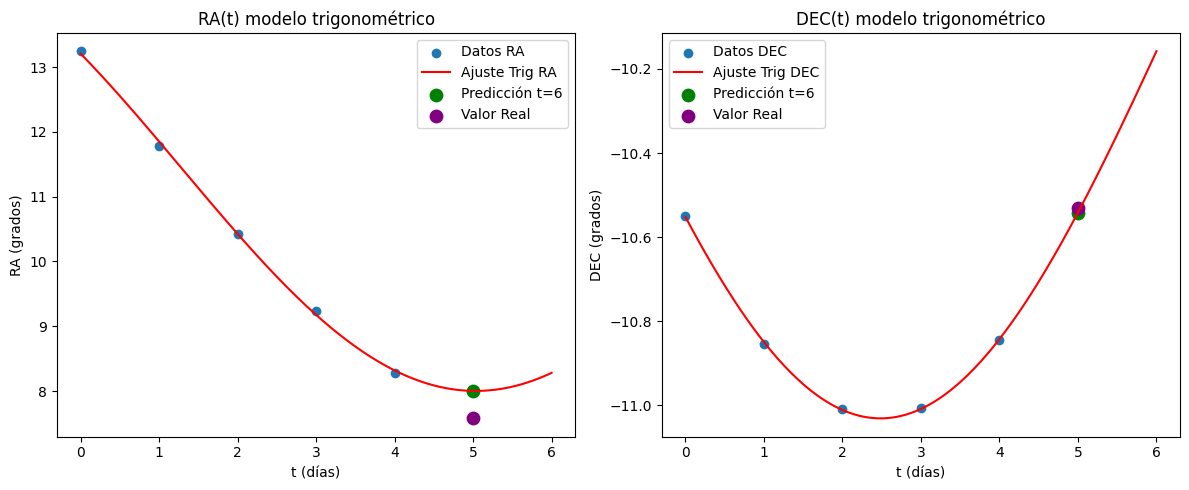

In [28]:
ra_deg = np.array([ 13.245, 11.783, 10.429, 9.2416, 8.283 ]) 
dec_deg = np.array([ -10.5497, -10.8541, -11.009, -11.006, -10.8438 ])

t = np.arange(len(ra_deg))


T_period = 15.0 
omega = 2*np.pi / T_period

A = np.column_stack([
    np.ones(5),
    np.cos(omega*t),
    np.sin(omega*t)
])

coeff_ra  = solve_min_sqr(A, ra_deg)# np.linalg.solve(A.T @ A, A.T @ ra_deg)
coeff_dec = solve_min_sqr(A, dec_deg) # np.linalg.solve(A.T @ A, A.T @ dec_deg)

t_fit = np.linspace(t.min(), 6, 300)

ra_fit  = coeff_ra[0]  + coeff_ra[1]*np.cos(omega*t_fit) + coeff_ra[2]*np.sin(omega*t_fit)
dec_fit = coeff_dec[0] + coeff_dec[1]*np.cos(omega*t_fit) + coeff_dec[2]*np.sin(omega*t_fit)

err_ra  = np.sum((A @ coeff_ra  - ra_deg )**2)
err_dec = np.sum((A @ coeff_dec - dec_deg)**2)

print("Coeficientes RA(t):", coeff_ra)
print("Error RA:", err_ra)

print("\nCoeficientes DEC(t):", coeff_dec)
print("Error DEC:", err_dec)

t_new = 5
ra_pred  = coeff_ra[0]  + coeff_ra[1]*np.cos(omega*t_new) + coeff_ra[2]*np.sin(omega*t_new)
dec_pred = coeff_dec[0] + coeff_dec[1]*np.cos(omega*t_new) + coeff_dec[2]*np.sin(omega*t_new)

print("\nPredicción para t=6:")
print("RA(t=6)  =", ra_pred)
print("DEC(t=6) =", dec_pred)

RA_real  = 7.5791
DEC_real = -10.5316

print("\nError respecto al valor real:")
print("Error RA =", ra_pred  - RA_real)
print("Error DEC =", dec_pred - DEC_real)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(t, ra_deg, label="Datos RA")
plt.plot(t_fit, ra_fit, label="Ajuste Trig RA", color='red')
plt.scatter(t_new, ra_pred, color='green', s=80, label="Predicción t=6")
plt.scatter(t_new, RA_real, color='purple', s=80, label="Valor Real")
plt.xlabel("t (días)")
plt.ylabel("RA (grados)")
plt.legend()
plt.title("RA(t) modelo trigonométrico")

plt.subplot(1,2,2)
plt.scatter(t, dec_deg, label="Datos DEC")
plt.plot(t_fit, dec_fit, label="Ajuste Trig DEC", color='red')
plt.scatter(t_new, dec_pred, color='green', s=80, label="Predicción t=6")
plt.scatter(t_new, DEC_real, color='purple', s=80, label="Valor Real")
plt.xlabel("t (días)")
plt.ylabel("DEC (grados)")
plt.legend()
plt.title("DEC(t) modelo trigonométrico")

plt.tight_layout()
plt.show()


In [ ]:
# Esto es para pasar las unidades de RA y Dec de grados a un valor fijo

ra = lambda h, m, s: 15*(h + m/60 + s/3600)
dec = lambda d, m, s: np.sign(d)*(np.abs(d) + m/60 + s/3600)

h    = 0
m_ra = 30
s_ra = 19

d    = -10
m    = 31
s    = 54


print(ra(h, m_ra, s_ra))
print(dec(d, m, s))

7.5791666666666675
-10.531666666666668
